In [21]:
import numpy as np
import pandas as pd

abalone_df = pd.read_table("abalone.data", sep=",",header=None)
abalone_df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
abalone_df.columns=["Sex","Length","Diameter","Height","Whole_wt","Shucked_wt","Viscera_wt","Shell_wt","Rings"]
#to predict age add 1.5
abalone_df["Age"] = abalone_df["Rings"] + 1.5
abalone_df.head()

,Sex,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [23]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

#Encode Sex column
abalone_df["Sex"] = class_labels.fit_transform(abalone_df["Sex"].values)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


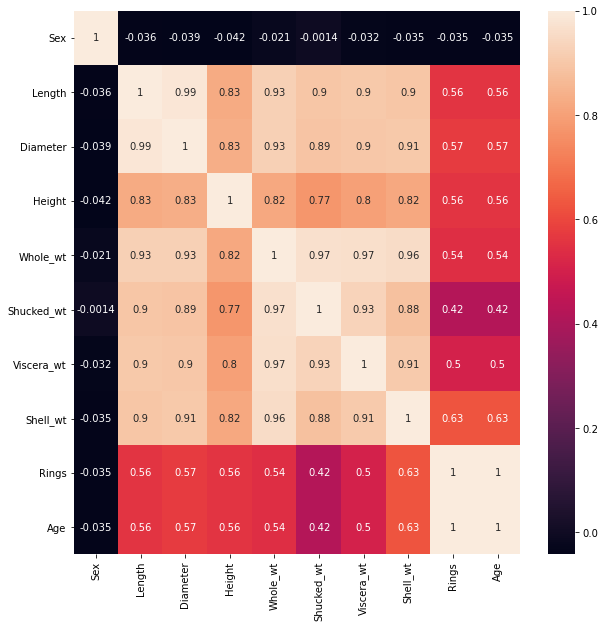

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = abalone_df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

plt.show()

In [25]:
abalone_df.corr()['Rings'].sort_values()

Sex          -0.034627
Shucked_wt    0.420884
Viscera_wt    0.503819
Whole_wt      0.540390
Length        0.556720
Height        0.557467
Diameter      0.574660
Shell_wt      0.627574
Rings         1.000000
Age           1.000000
Name: Rings, dtype: float64

In [28]:
#abalone_df = abalone_df.drop(['Sex','Shucked_wt'],axis=1)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


2.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#X = abalone_df.drop(['Age','Rings'],axis=1)
X = abalone_df.drop(['Diameter','Age', 'Rings', 'Whole_wt', 'Shucked_wt', 'Viscera_wt'],axis=1)
y = abalone_df['Age']

estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=4,step=1)
selector = selector.fit(X,y)

print(selector.support_)
print(selector.ranking_)

#Diameter, Height, and Shell Weight are the 3 most important features

[ True  True  True  True]
[1 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.tree import DecisionTreeRegressor

#X = abalone_df[['Diameter','Whole_wt','Shucked_wt', 'Viscera_wt']]
X = abalone_df[['']]
y = abalone_df['Age']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
# decision tree classifier
model = DecisionTreeRegressor(max_depth = 4,min_samples_leaf=1,random_state=1)

In [ ]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse_model = MSE(y_test,y_pred)
rmse_model = mse_model**(1/2)
print("Root Mean Squared Error: ", rmse_model)
print("Mean Squared Error: ", mse_model)
r2_val = r2_score(y_test,y_pred)
print("R2 Score: ", r2_val)

3.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 11, n_estimators=500, min_samples_leaf = 1, random_state =7)

rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse_rf = MSE(y_test,y_pred)
rmse_rf = mse_rf **(1/2)

print("Root Mean Squared Error: ", rmse_rf)
print("Mean Squared Error: ", mse_rf)

4.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

In [ ]:
import xgboost as xg
xgb = xg.XGBRegressor(n_estimators=500,max_depth=1,random_state=1)

xgb_model = xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

mse_xg = MSE(y_test, y_pred)
rmse_xg = mse_xg ** (1/2)

print("Root Mean Squared Error: ", rmse_xg)
print("Mean Squared Error: ", mse_xg)